<a href="https://colab.research.google.com/github/lyan2003/StockPro/blob/master/Numerical_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [ ]:
# Parameters
D = 1.0
a = 0.3
x_min, x_max = -20, 20
N = 200
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]
T = 10
dt = 0.01
u0 = 1 / (1 + np.exp(x / np.sqrt(2 * D)))

In [ ]:
def euler_method(u0, dt, T, D, a, dx):
    Nt = int(T / dt)
    u = u0.copy()
    solutions = [u.copy()]
    for _ in range(Nt):
        dudt = np.zeros_like(u)
        dudt[1:-1] = D * (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2 - u[1:-1] * (1 - u[1:-1]) * (a - u[1:-1])
        dudt[0] = dudt[1]
        dudt[-1] = dudt[-2]
        u = u + dt * dudt
        solutions.append(u.copy())
    return np.array(solutions)

In [ ]:
def analytical_solution(x, t, D=1.0, a=0.3):
    return 1 / (1 + np.exp(x / np.sqrt(2 * D) + (a - 0.5) * t))

def compute_rmse(numerical, analytical):
    return np.sqrt(np.mean((numerical - analytical) ** 2))

In [ ]:
# Euler
start = time()
euler_solutions = euler_method(u0, dt, T, D, a, dx)
euler_time = time() - start
u_euler = euler_solutions[-1]



# Analytical
u_exact = analytical_solution(x, T)

# Errors
rmse_euler = compute_rmse(u_euler, u_exact)

# Print results
print(f"Euler: Time = {euler_time:.4f}s, RMSE = {rmse_euler:.6f}")


Euler: Time = 0.0219s, RMSE = 0.000096


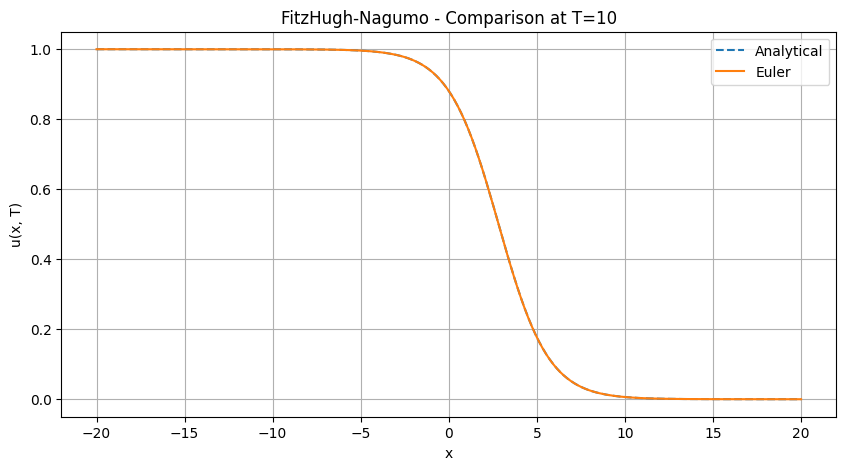

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x, u_exact, '--', label='Analytical')
plt.plot(x, u_euler, label='Euler')
plt.title("FitzHugh-Nagumo - Comparison at T=10")
plt.xlabel("x")
plt.ylabel("u(x, T)")
plt.legend()
plt.grid(True)
plt.show()